In [1]:
# Import modules needed: 
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages
import datetime

We can get the daily data of Co2 at: http://scrippsco2.ucsd.edu/data/atmospheric_co2/ljo. I dowload the data as a csv file. 

In [2]:
cd  /Users/nataliaerazo/Downloads

/Users/nataliaerazo/Downloads


In [3]:
lao=pd.read_csv('lao.csv')

In [4]:
print lao.head()

          date     co2
0  29-Mar-1958  316.19
1   5-Apr-1958  317.31
2  12-Apr-1958  317.69
3  19-Apr-1958  317.58
4  26-Apr-1958  316.48


In [5]:
lao=pd.read_csv('lao.csv',usecols=[0,1],index_col='date',parse_dates=True)
print lao.info() #create a datetime index for this we use parse_dates ( it tells it is a date)



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2982 entries, 1958-03-29 to 2016-09-24
Data columns (total 1 columns):
co2    2982 non-null float64
dtypes: float64(1)
memory usage: 46.6 KB
None


In [6]:
# We can also get the data from the scripps website 
url='http://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/weekly/weekly_in_situ_co2_mlo.csv'
lao_scripps=pd.read_csv(url,skiprows=68,usecols=[0,1]) #something wron gin the data so we have to skip row 68 to read it
print lao_scripps.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 2 columns):
1958-12-27    2976 non-null object
 315.21       2976 non-null float64
dtypes: float64(1), object(1)
memory usage: 46.6+ KB
None


Lets plot the data!

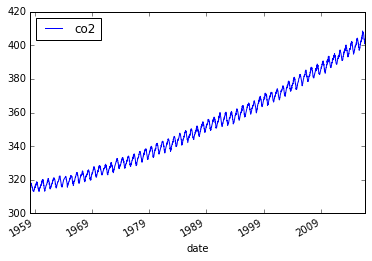

In [7]:
lao.plot()

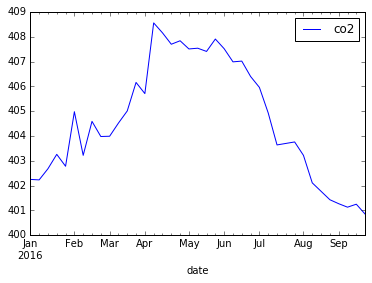

In [8]:
lao['2016'].plot() # CO2 emissions of 2016

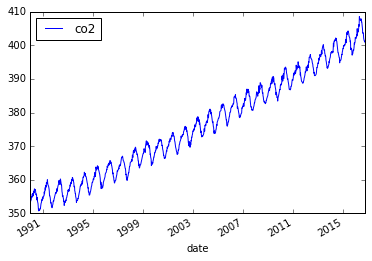

In [9]:
lao['1990':'2016'].plot() # Co2 emission of the last 26 years 

/Users/nataliaerazo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)


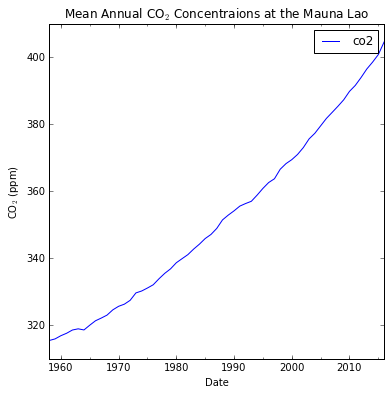

In [11]:
# Make a plot of mean anuual co2 concentrations 
fig,ax=plt.subplots()
fig.set_size_inches(6,6)
lao.resample('A',how=np.mean).plot(ax=ax)
ax.set_ylabel('CO$_2$ (ppm)')
ax.set_xlabel('Date')
ax.set_title('Mean Annual CO$_2$ Concentraions at the Mauna Lao')

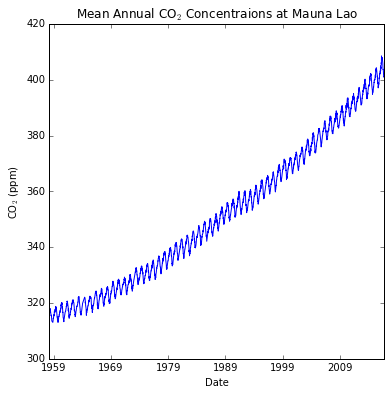

In [12]:
fig,ax=plt.subplots()
fig.set_size_inches(6,6)
x=lao.index
y=lao.co2
ax.plot(x,y)
ax.set_ylabel('CO$_2$ (ppm)')
ax.set_xlabel('Date')
ax.set_title('Mean Annual CO$_2$ Concentraions at Mauna Lao')

/Users/nataliaerazo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
/Users/nataliaerazo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)


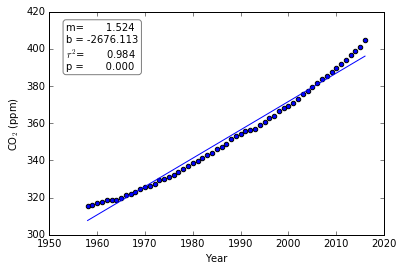

In [13]:
# Lookig at the CO2 average concentrations and a linear correlation. 
fig,ax=plt.subplots()
props=dict(boxstyle='round',facecolor='white',alpha=0.5)

x=lao.co2.resample('A',how=np.mean).index.year
y=lao.co2.resample('A',how=np.mean)
ax.scatter(x,y)

results=stats.linregress(x,y)
ax.plot(x,results[0]*x+results[1])
textstr='m={:>12.3f}\nb ={:>10.3f}\n$r^2$={:>12.3f}\np ={:>12.3f}'.format(results[0],results[1],results[2]**2,results[3])
ax.text(0.05,0.95,textstr,transform=ax.transAxes,fontsize=10,verticalalignment='top',bbox=props)
ax.set_ylabel('CO$_2$ (ppm)')
ax.set_xlabel('Year')

This graphs shows the average of CO2 and looks for a linear correlation using the mean values. 
the $r^2$ looks good but the curve looks non-linear. We can look at it closely and plot how far off the value is from the line for each year. Plot the residual by looking at the the difference in y-space for each value for each year. 

/Users/nataliaerazo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  app.launch_new_instance()
/Users/nataliaerazo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)


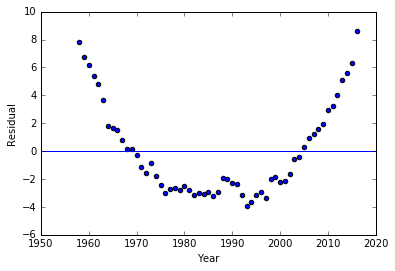

In [14]:
fig,ax=plt.subplots()

x=lao.co2.resample('A',how=np.mean).index.year
y=lao.co2.resample('A',how=np.mean)

results=stats.linregress(x,y)
ax.scatter(x,y-(results[0]*x+results[1]))
ax.set_ylabel('Residual')
ax.set_xlabel('Year')
ax.axhline(y=0)

We can see from the above graph that linear is not working! So we can look at poly1d and see how a second order equation fits the data. 
You can use textstr to make a string with the results of poly1d: 
textstr='CO2={}'.format(poly1d(a))



/Users/nataliaerazo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
/Users/nataliaerazo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)


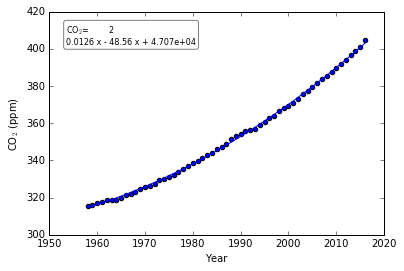

In [15]:
fit_order=2

fig,ax=plt.subplots()
props=dict(boxstyle='round',facecolor='white',alpha=0.5)

x=lao.co2.resample('A',how=np.mean).index.year
y=lao.co2.resample('A',how=np.mean)

x_fit=np.linspace(x.min(),x.max())  #set the range using the data
a=np.polyfit(x,y,fit_order)  #I just copied from above to have in the same cell
polynominal=np.poly1d(a)
y_fit=polynominal(x_fit)

textstr='CO$_2$={}'.format(polynominal)
ax.text(0.05,0.95,textstr,transform=ax.transAxes,fontsize=8,verticalalignment='top',bbox=props)

ax.plot(x_fit,y_fit)
ax.scatter(x,y)
ax.set_ylabel('CO$_2$ (ppm)')
ax.set_xlabel('Year')

This looks better! Now we can also look at the residuals 

/Users/nataliaerazo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
/Users/nataliaerazo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)


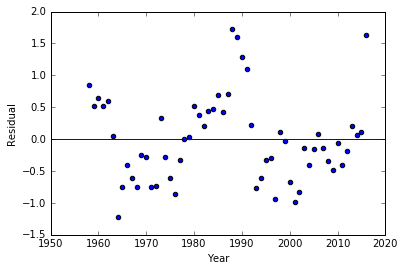

In [16]:
fit_order=2

fig,ax=plt.subplots()

x=lao.co2.resample('A',how=np.mean).index.year
y=lao.co2.resample('A',how=np.mean)

x_fit=np.linspace(x.min(),x.max())  
a=np.polyfit(x,y,fit_order)  
polynominal=np.poly1d(a)

ax.scatter(x,y-polynominal(x))

ax.set_ylabel('Residual')
ax.set_xlabel('Year')
ax.axhline(y=0)

/Users/nataliaerazo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
/Users/nataliaerazo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)


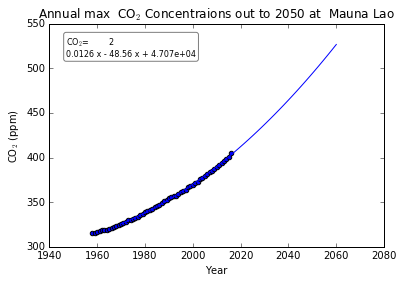

In [17]:
# Now we can make a plot to predict the CO2 for 2016-2060

fit_order=2

fig,ax=plt.subplots()
props=dict(boxstyle='round',facecolor='white',alpha=0.5)

x=lao.co2.resample('A',how=np.mean).index.year
y=lao.co2.resample('A',how=np.mean)

x_fit=np.linspace(1970,2060)  
a=np.polyfit(x,y,fit_order)  
polynominal=np.poly1d(a)
y_fit=polynominal(x_fit)

ax.plot(x_fit,y_fit)
ax.scatter(x,y)
ax.set_ylabel('CO$_2$ (ppm)')
ax.set_xlabel('Year')
ax.set_title('Annual max  CO$_2$ Concentraions out to 2050 at  Mauna Lao')

textstr='CO$_2$={}'.format(np.poly1d(a))
ax.text(0.05,0.95,textstr,transform=ax.transAxes,fontsize=8,verticalalignment='top',bbox=props)